In [1]:
import os
import numpy as np

# Function to extract Cα coordinates from a PDB file
def extract_ca_coordinates(pdb_file, chainID):
    ca_coords = []
    
    with open(pdb_file, 'r') as file:
        for line in file:
            if line.startswith("ATOM") and " CA " in line and line[21] == chainID:
                x = float(line[30:38].strip())
                y = float(line[38:46].strip())
                z = float(line[46:54].strip())
                ca_coords.append([x, y, z])
    
    return np.array(ca_coords)

# Function to calculate the RMSF for each residue
def calculate_rmsf(aligned_coords):
    n_structures = len(aligned_coords)
    average_coords = np.mean(aligned_coords, axis=0)  # Mean coordinates per residue
    
    # Calculate RMSF per residue
    rmsf = np.sqrt(np.mean(np.sum((aligned_coords - average_coords)**2, axis=2), axis=0))
    return rmsf

# Function to superpose structures to a reference structure
def superpose_structures(ref_coords, target_coords):
    # Perform a Kabsch algorithm-based superposition
    ref_center = np.mean(ref_coords, axis=0)
    target_center = np.mean(target_coords, axis=0)

    ref_centered = ref_coords - ref_center
    target_centered = target_coords - target_center

    H = np.dot(target_centered.T, ref_centered)
    U, S, Vt = np.linalg.svd(H)
    R = np.dot(Vt.T, U.T)

    if np.linalg.det(R) < 0:
        Vt[-1, :] *= -1
        R = np.dot(Vt.T, U.T)

    aligned_coords = np.dot(target_centered, R) + ref_center
    return aligned_coords

# Process all PDB files and calculate RMSF
def calculate_rmsf_for_recycles(folder, model_number, model_seed, chainID='A'):
    coords_per_recycle = []

    # Iterate over recycles 0 to 12
    for r in range(13):
        pdb_file = None
        # Look for the corresponding PDB file for the specified model number, recycle, and seed
        for filename in os.listdir(folder):
            if (filename.endswith(".pdb") and 
                f'model_{model_number}_ptm_r{r}_seed{model_seed}' in filename):
                pdb_file = os.path.join(folder, filename)
                break

        if pdb_file is None:
            print(f"PDB file for recycle {r} with model {model_number} and seed {model_seed} not found.")
            continue
        
        # Extract Cα coordinates
        ca_coords = extract_ca_coordinates(pdb_file, chainID)
        coords_per_recycle.append(ca_coords)
    
    if not coords_per_recycle:
        print("No valid structures found.")
        return None

    # Use the first structure (recycle 0) as the reference
    ref_coords = coords_per_recycle[0]
    aligned_coords = []

    # Superpose each structure to the reference
    for coords in coords_per_recycle:
        aligned = superpose_structures(ref_coords, coords)
        aligned_coords.append(aligned)
    
    # Convert aligned coordinates to a numpy array
    aligned_coords = np.array(aligned_coords)

    # Calculate RMSF for each residue
    rmsf = calculate_rmsf(aligned_coords)
    return rmsf

# Plot RMSF
def plot_rmsf(rmsf, model_number, model_seed):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    plt.plot(rmsf, marker='o', linestyle='-', color='blue')
    plt.title(f'RMSF per Residue (Recycle 0 to 12) for Model {model_number}, Seed {model_seed}', fontsize=15)
    plt.xlabel('Residue Index', fontsize=12)
    plt.ylabel('RMSF (Å)', fontsize=12)
    plt.grid(True)
    plt.show()



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


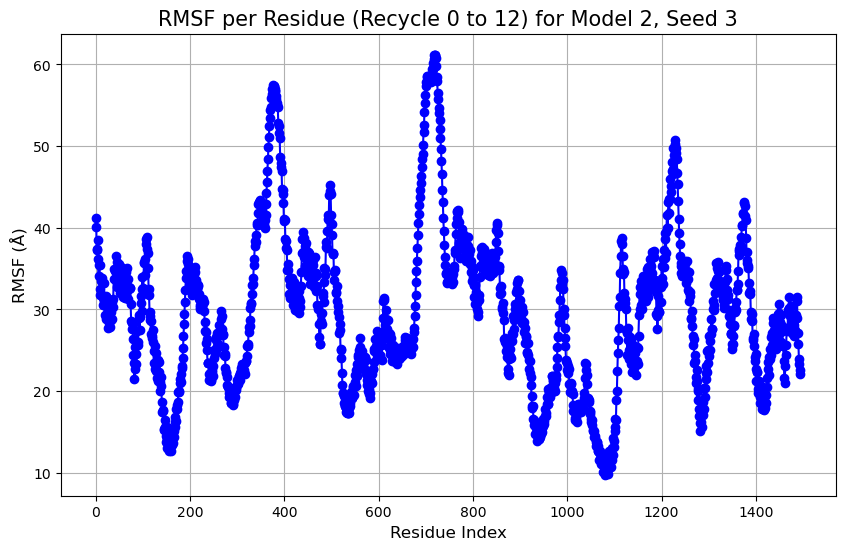

In [3]:
# Usage example
#folder_path = '/Users/adrianahernandezgonzalez/LabNotebook/10-24/states/partialAlphaCaV12HS8HLPlocalrun_b3702_32_64_10/pdb'
folder = '/Users/adrianahernandezgonzalez/LabNotebook/11-24/states/partialAlphaCaV12HS8HLPlocalrun_b3702_8_16_10/pdb/'  # Replace with the path to your folder containing PDB files
model_number = '2'  # Replace with the specific model number (e.g., '1')
model_seed = '3'      # Replace with the specific model seed (e.g., '1')
rmsf_values = calculate_rmsf_for_recycles(folder, model_number, model_seed, chainID='A')



if rmsf_values is not None:
    plot_rmsf(rmsf_values, model_number, model_seed)


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Function to extract Cα coordinates from a PDB file
def extract_ca_coordinates(pdb_file, chainID):
    ca_coords = []
    
    with open(pdb_file, 'r') as file:
        for line in file:
            if line.startswith("ATOM") and " CA " in line and line[21] == chainID:
                x = float(line[30:38].strip())
                y = float(line[38:46].strip())
                z = float(line[46:54].strip())
                ca_coords.append([x, y, z])
    
    return np.array(ca_coords)

# Function to superpose structures to a reference structure
def superpose_structures(ref_coords, target_coords):
    # Perform a Kabsch algorithm-based superposition
    ref_center = np.mean(ref_coords, axis=0)
    target_center = np.mean(target_coords, axis=0)

    ref_centered = ref_coords - ref_center
    target_centered = target_coords - target_center

    H = np.dot(target_centered.T, ref_centered)
    U, S, Vt = np.linalg.svd(H)
    R = np.dot(Vt.T, U.T)

    if np.linalg.det(R) < 0:
        Vt[-1, :] *= -1
        R = np.dot(Vt.T, U.T)

    aligned_coords = np.dot(target_centered, R) + ref_center
    return aligned_coords

# Function to calculate the RMSF for each residue
def calculate_rmsf(aligned_coords):
    n_structures = len(aligned_coords)
    average_coords = np.mean(aligned_coords, axis=0)  # Mean coordinates per residue
    
    # Calculate RMSF per residue
    rmsf = np.sqrt(np.mean(np.sum((aligned_coords - average_coords)**2, axis=2), axis=0))
    return rmsf

# Function to compute RMSF for a single recycle
def compute_rmsf_for_recycle(folder, model_number, model_seed, recycle, chainID='A'):
    # Look for the corresponding PDB file
    pdb_file = None
    for filename in os.listdir(folder):
        if (filename.endswith(".pdb") and 
            f'model_{model_number}_ptm_r{recycle}_seed{model_seed}' in filename):
            pdb_file = os.path.join(folder, filename)
            break

    if pdb_file is None:
        print(f"PDB file for recycle {recycle} with model {model_number} and seed {model_seed} not found.")
        return None
    
    # Extract Cα coordinates
    ca_coords = extract_ca_coordinates(pdb_file, chainID)
    return ca_coords

# Function to calculate RMSF differences between successive recycles
def analyze_rmsf_changes(folder, model_number, model_seed, chainID='A'):
    rmsf_differences = []
    recycle_pairs = []
    
    # Iterate from recycle 0 to 11 (analyzing successive pairs)
    for r in range(12):
        coords_1 = compute_rmsf_for_recycle(folder, model_number, model_seed, r, chainID)
        coords_2 = compute_rmsf_for_recycle(folder, model_number, model_seed, r + 1, chainID)
        
        if coords_1 is None or coords_2 is None:
            continue
        
        # Superpose both structures to the reference (coords_1)
        aligned_1 = superpose_structures(coords_1, coords_1)  # self-alignment for consistency
        aligned_2 = superpose_structures(coords_1, coords_2)  # align coords_2 to coords_1
        
        # Calculate RMSF for the aligned structures
        aligned_coords = np.array([aligned_1, aligned_2])
        rmsf = calculate_rmsf(aligned_coords)
        
        # Calculate the difference in RMSF between the two recycles
        rmsf_differences.append(rmsf)
        recycle_pairs.append((r, r + 1))
    
    return rmsf_differences, recycle_pairs

# Plot RMSF Differences for Successive Recycles
def plot_rmsf_differences(rmsf_differences, recycle_pairs):
    plt.figure(figsize=(12, 8))
    
    # Plot each difference for the recycle pairs
    for i, (rmsf_diff, (r1, r2)) in enumerate(zip(rmsf_differences, recycle_pairs)):
        plt.plot(rmsf_diff, marker='o', linestyle='-', label=f'Recycle {r1} to {r2}')
    
    plt.title('RMSF Differences Between Successive Recycles', fontsize=15)
    plt.xlabel('Residue Index', fontsize=12)
    plt.ylabel('RMSF Difference (Å)', fontsize=12)
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()



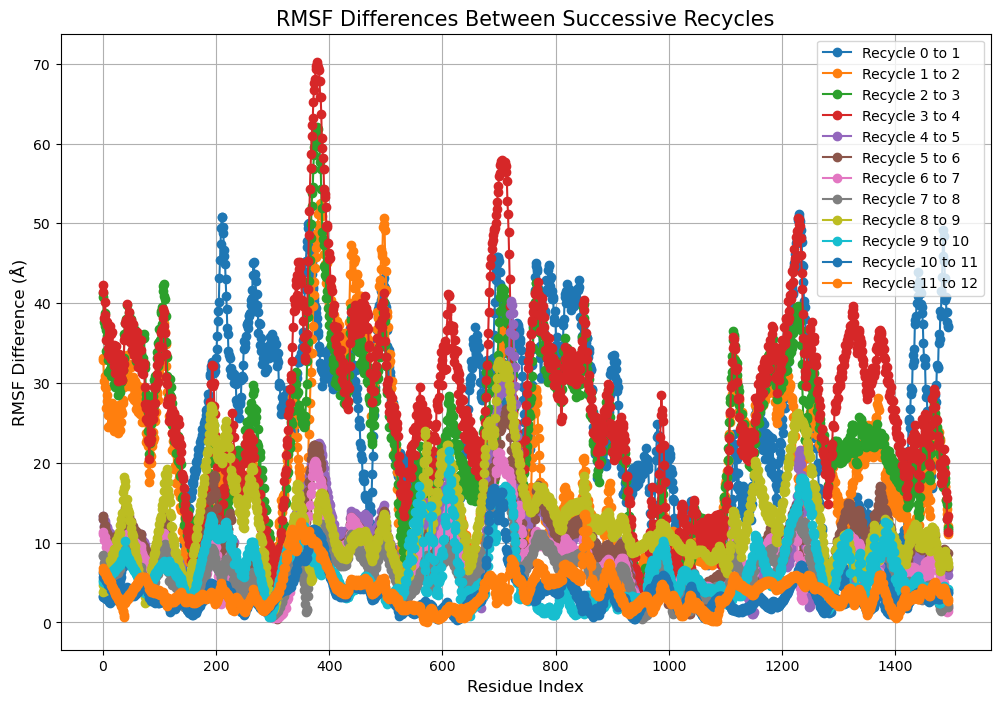

In [6]:
# Usage example
folder = '/Users/adrianahernandezgonzalez/LabNotebook/11-24/states/partialAlphaCaV12HS8HLPlocalrun_b3702_8_16_10/pdb/'  # Replace with the path to your folder containing PDB files
model_number = '2'  # Replace with the specific model number (e.g., '1')
model_seed = '3'      # Replace with the specific model seed (e.g., '1')

# Analyze RMSF changes between successive recycles
rmsf_differences, recycle_pairs = analyze_rmsf_changes(folder, model_number, model_seed, chainID='A')

# Plot the differences
if rmsf_differences:
    plot_rmsf_differences(rmsf_differences, recycle_pairs)


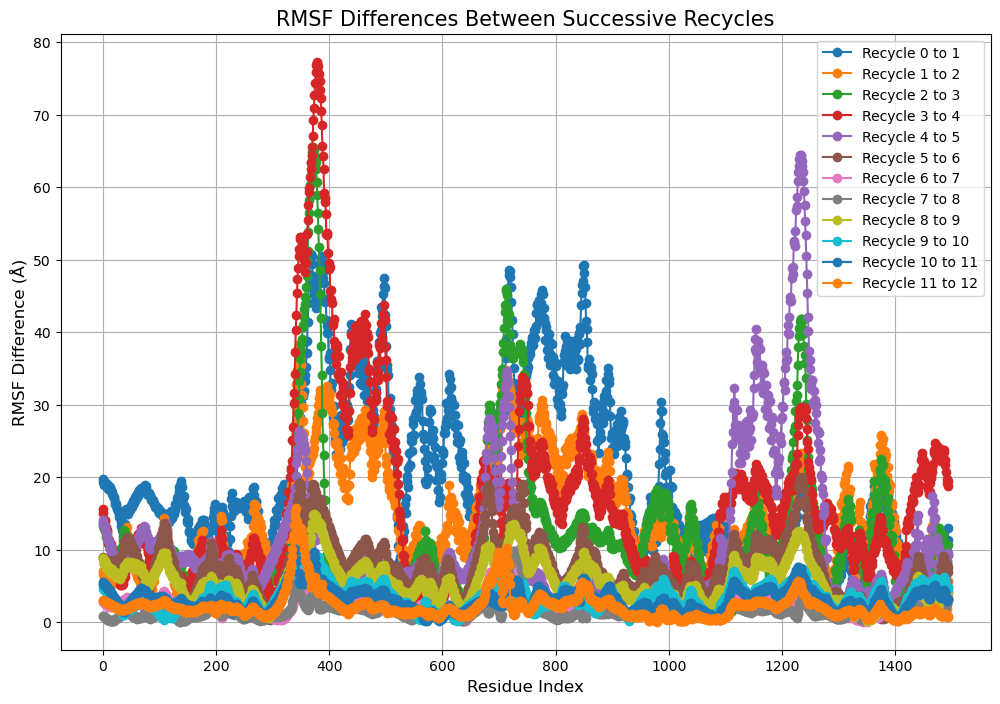

In [7]:
# Usage example
folder = '/Users/adrianahernandezgonzalez/LabNotebook/11-24/states/partialAlphaCaV12HS8HLPlocalrun_b3702_32_64_10/pdb/'  # Replace with the path to your folder containing PDB files
model_number = '2'  # Replace with the specific model number (e.g., '1')
model_seed = '3'      # Replace with the specific model seed (e.g., '1')

# Analyze RMSF changes between successive recycles
rmsf_differences, recycle_pairs = analyze_rmsf_changes(folder, model_number, model_seed, chainID='A')

# Plot the differences
if rmsf_differences:
    plot_rmsf_differences(rmsf_differences, recycle_pairs)


In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Function to extract Cα coordinates from a PDB file
def extract_ca_coordinates(pdb_file, chainID):
    ca_coords = []
    
    with open(pdb_file, 'r') as file:
        for line in file:
            if line.startswith("ATOM") and " CA " in line and line[21] == chainID:
                x = float(line[30:38].strip())
                y = float(line[38:46].strip())
                z = float(line[46:54].strip())
                ca_coords.append([x, y, z])
    
    return np.array(ca_coords)

# Function to superpose structures to a reference structure
def superpose_structures(ref_coords, target_coords):
    # Perform a Kabsch algorithm-based superposition
    ref_center = np.mean(ref_coords, axis=0)
    target_center = np.mean(target_coords, axis=0)

    ref_centered = ref_coords - ref_center
    target_centered = target_coords - target_center

    H = np.dot(target_centered.T, ref_centered)
    U, S, Vt = np.linalg.svd(H)
    R = np.dot(Vt.T, U.T)

    if np.linalg.det(R) < 0:
        Vt[-1, :] *= -1
        R = np.dot(Vt.T, U.T)

    aligned_coords = np.dot(target_coords - target_center, R) + ref_center
    return aligned_coords

# Function to calculate RMSF for each residue over recycles
def calculate_rmsf_over_recycles(folder, model_number, model_seed, chainID='A'):
    rmsf_per_recycle = []

    # Use recycle 0 as the reference
    ref_coords = None
    for filename in os.listdir(folder):
        if filename.endswith(".pdb") and f'model_{model_number}_ptm_r0_seed{model_seed}' in filename:
            ref_coords = extract_ca_coordinates(os.path.join(folder, filename), chainID)
            break

    if ref_coords is None:
        print(f"Reference PDB for recycle 0 not found for model {model_number} and seed {model_seed}.")
        return None

    # Calculate RMSF for each recycle
    for r in range(13):
        pdb_file = None
        for filename in os.listdir(folder):
            if filename.endswith(".pdb") and f'model_{model_number}_ptm_r{r}_seed{model_seed}' in filename:
                pdb_file = os.path.join(folder, filename)
                break

        if pdb_file is None:
            print(f"PDB file for recycle {r} with model {model_number} and seed {model_seed} not found.")
            continue

        # Extract Cα coordinates
        target_coords = extract_ca_coordinates(pdb_file, chainID)

        # Superpose to the reference coordinates (recycle 0)
        aligned_coords = superpose_structures(ref_coords, target_coords)
        
        # Calculate RMSF for this recycle
        rmsf = np.sqrt(np.mean(np.sum((aligned_coords - ref_coords)**2, axis=1)))
        rmsf_per_recycle.append(rmsf)
    
    return rmsf_per_recycle

# Plot RMSF Changes Over Recycles
def plot_rmsf_change_over_recycles(rmsf_per_recycle, model_number, model_seed):
    recycles = list(range(len(rmsf_per_recycle)))
    
    plt.figure(figsize=(10, 6))
    plt.plot(recycles, rmsf_per_recycle, marker='o', linestyle='-', color='green')
    plt.title(f'RMSF Change Over Recycles for Model {model_number}, Seed {model_seed}', fontsize=15)
    plt.xlabel('Recycle Number', fontsize=12)
    plt.ylabel('Average RMSF (Å)', fontsize=12)
    plt.grid(True)
    plt.show()



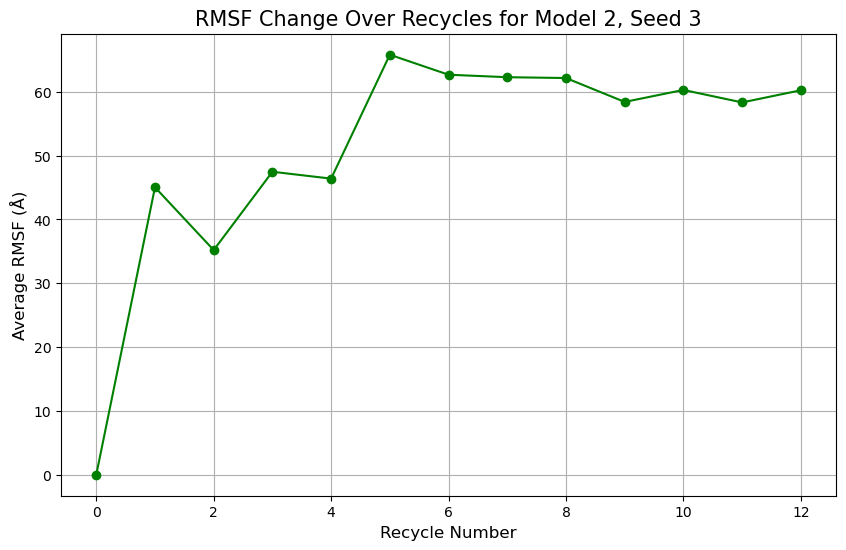

In [10]:
# Usage example
folder = '/Users/adrianahernandezgonzalez/LabNotebook/11-24/states/partialAlphaCaV12HS8HLPlocalrun_b3702_32_64_10/pdb/'  # Replace with the path to your folder containing PDB files
model_number = '2'  # Replace with the specific model number (e.g., '1')
model_seed = '3'      # Replace with the specific model seed (e.g., '1')

# Calculate RMSF changes over recycles
rmsf_per_recycle = calculate_rmsf_over_recycles(folder, model_number, model_seed, chainID='A')

# Plot the changes if calculation was successful
if rmsf_per_recycle is not None:
    plot_rmsf_change_over_recycles(rmsf_per_recycle, model_number, model_seed)


In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Function to extract Cα coordinates from a PDB file
def extract_ca_coordinates(pdb_file, chainID):
    ca_coords = []
    
    with open(pdb_file, 'r') as file:
        for line in file:
            if line.startswith("ATOM") and " CA " in line and line[21] == chainID:
                x = float(line[30:38].strip())
                y = float(line[38:46].strip())
                z = float(line[46:54].strip())
                ca_coords.append([x, y, z])
    
    return np.array(ca_coords)

# Function to superpose structures to a reference structure
def superpose_structures(ref_coords, target_coords):
    # Perform a Kabsch algorithm-based superposition
    ref_center = np.mean(ref_coords, axis=0)
    target_center = np.mean(target_coords, axis=0)

    ref_centered = ref_coords - ref_center
    target_centered = target_coords - target_center

    H = np.dot(target_centered.T, ref_centered)
    U, S, Vt = np.linalg.svd(H)
    R = np.dot(Vt.T, U.T)

    if np.linalg.det(R) < 0:
        Vt[-1, :] *= -1
        R = np.dot(Vt.T, U.T)

    aligned_coords = np.dot(target_coords - target_center, R) + ref_center
    return aligned_coords

# Function to calculate RMSF for each recycle
def calculate_rmsf_over_recycles(folder, model_number, model_seed, chainID='A'):
    rmsf_per_recycle = []

    # Use recycle 0 as the reference
    ref_coords = None
    for filename in os.listdir(folder):
        if filename.endswith(".pdb") and f'model_{model_number}_ptm_r0_seed{model_seed}' in filename:
            ref_coords = extract_ca_coordinates(os.path.join(folder, filename), chainID)
            break

    if ref_coords is None:
        print(f"Reference PDB for recycle 0 not found for model {model_number} and seed {model_seed}.")
        return None

    # Calculate RMSF for each recycle
    for r in range(13):
        pdb_file = None
        for filename in os.listdir(folder):
            if filename.endswith(".pdb") and f'model_{model_number}_ptm_r{r}_seed{model_seed}' in filename:
                pdb_file = os.path.join(folder, filename)
                break

        if pdb_file is None:
            print(f"PDB file for recycle {r} with model {model_number} and seed {model_seed} not found.")
            continue

        # Extract Cα coordinates
        target_coords = extract_ca_coordinates(pdb_file, chainID)

        # Superpose to the reference coordinates (recycle 0)
        aligned_coords = superpose_structures(ref_coords, target_coords)
        
        # Calculate RMSF for this recycle
        rmsf = np.sqrt(np.mean(np.sum((aligned_coords - ref_coords)**2, axis=1)))
        rmsf_per_recycle.append(rmsf)
    
    return rmsf_per_recycle

# Function to calculate absolute delta RMSF between successive recycles
def calculate_absolute_delta_rmsf(rmsf_per_recycle):
    # Ensure the differences are calculated as absolute values
    absolute_delta_rmsf = [abs(rmsf_per_recycle[i+1] - rmsf_per_recycle[i]) for i in range(len(rmsf_per_recycle) - 1)]
    return absolute_delta_rmsf

# Plot Absolute Delta RMSF Over Recycles
def plot_absolute_delta_rmsf(absolute_delta_rmsf, model_number, model_seed):
    recycles = list(range(1, len(absolute_delta_rmsf) + 1))  # Delta starts from recycle 1 (difference with previous)
    
    plt.figure(figsize=(10, 6))
    plt.plot(recycles, absolute_delta_rmsf, marker='o', linestyle='-', color='purple')
    plt.title(f'Absolute Delta RMSF Over Recycles for Model {model_number}, Seed {model_seed}', fontsize=15)
    plt.xlabel('Recycle Number', fontsize=12)
    plt.ylabel('Absolute Delta RMSF (Å)', fontsize=12)
    plt.grid(True)
    plt.show()


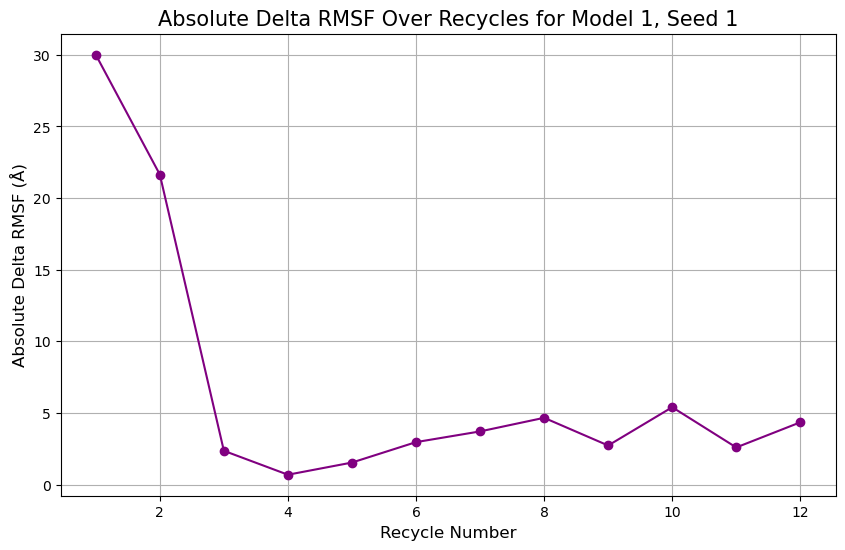

In [12]:

# Usage example
folder = '/Users/adrianahernandezgonzalez/LabNotebook/11-24/states/partialAlphaCaV12HS8HLPlocalrun_b3702_32_64_10/pdb/'  # Replace with the path to your folder containing PDB files
model_number = '1'  # Replace with the specific model number (e.g., '1')
model_seed = '1'      # Replace with the specific model seed (e.g., '1')


# Calculate RMSF changes over recycles
rmsf_per_recycle = calculate_rmsf_over_recycles(folder, model_number, model_seed, chainID='A')

# Calculate absolute delta RMSF if calculation was successful
if rmsf_per_recycle is not None and len(rmsf_per_recycle) > 1:
    absolute_delta_rmsf = calculate_absolute_delta_rmsf(rmsf_per_recycle)
    plot_absolute_delta_rmsf(absolute_delta_rmsf, model_number, model_seed)


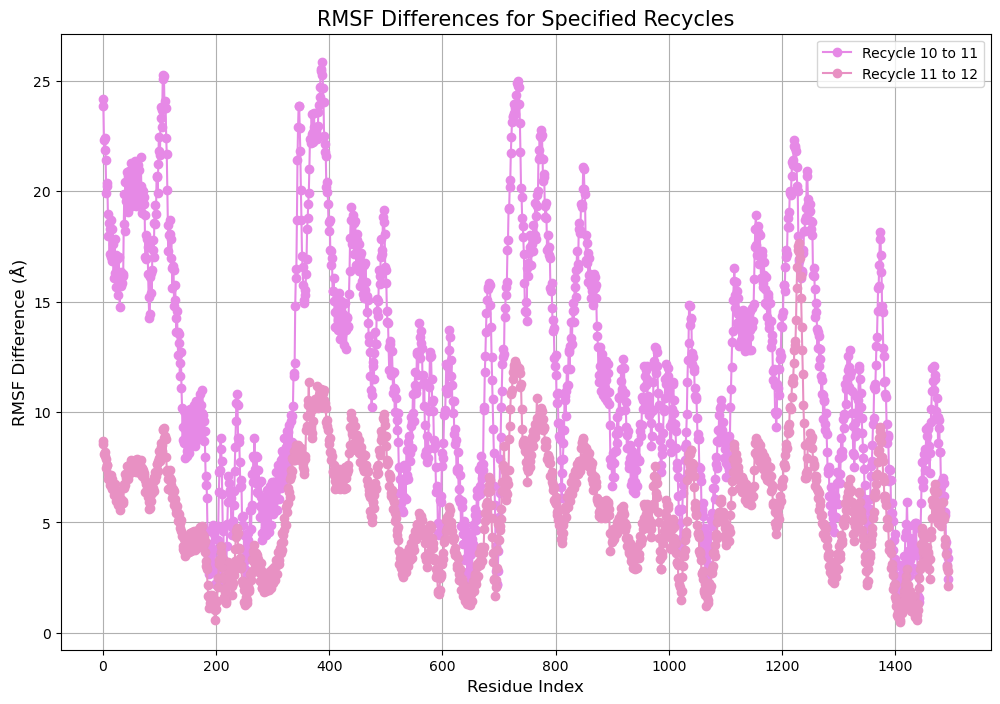

In [32]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Function to extract Cα coordinates from a PDB file
def extract_ca_coordinates(pdb_file, chainID):
    ca_coords = []
    
    with open(pdb_file, 'r') as file:
        for line in file:
            if line.startswith("ATOM") and " CA " in line and line[21] == chainID:
                x = float(line[30:38].strip())
                y = float(line[38:46].strip())
                z = float(line[46:54].strip())
                ca_coords.append([x, y, z])
    
    return np.array(ca_coords)

# Function to superpose structures to a reference structure
def superpose_structures(ref_coords, target_coords):
    ref_center = np.mean(ref_coords, axis=0)
    target_center = np.mean(target_coords, axis=0)

    ref_centered = ref_coords - ref_center
    target_centered = target_coords - target_center

    H = np.dot(target_centered.T, ref_centered)
    U, S, Vt = np.linalg.svd(H)
    R = np.dot(Vt.T, U.T)

    if np.linalg.det(R) < 0:
        Vt[-1, :] *= -1
        R = np.dot(Vt.T, U.T)

    aligned_coords = np.dot(target_centered, R) + ref_center
    return aligned_coords

# Function to calculate the RMSF for each residue
def calculate_rmsf(aligned_coords):
    average_coords = np.mean(aligned_coords, axis=0)  # Mean coordinates per residue
    rmsf = np.sqrt(np.mean(np.sum((aligned_coords - average_coords)**2, axis=2), axis=0))
    return rmsf

# Function to compute RMSF for a single recycle
def compute_rmsf_for_recycle(folder, model_number, model_seed, recycle, chainID='A'):
    pdb_file = None
    for filename in os.listdir(folder):
        if (filename.endswith(".pdb") and 
            f'model_{model_number}_ptm_r{recycle}_seed{model_seed}' in filename):
            pdb_file = os.path.join(folder, filename)
            break

    if pdb_file is None:
        print(f"PDB file for recycle {recycle} with model {model_number} and seed {model_seed} not found.")
        return None
    
    ca_coords = extract_ca_coordinates(pdb_file, chainID)
    return ca_coords

# Function to analyze RMSF differences across a range of recycles
def analyze_rmsf_range(folder, model_number, model_seed, r_start, r_end, chainID='A'):
    rmsf_differences = []
    recycle_pairs = []

    for r1 in range(r_start, r_end):
        r2 = r1 + 1
        coords_1 = compute_rmsf_for_recycle(folder, model_number, model_seed, r1, chainID)
        coords_2 = compute_rmsf_for_recycle(folder, model_number, model_seed, r2, chainID)
        
        if coords_1 is None or coords_2 is None:
            continue
        
        aligned_1 = superpose_structures(coords_1, coords_1)
        aligned_2 = superpose_structures(coords_1, coords_2)
        
        aligned_coords = np.array([aligned_1, aligned_2])
        rmsf = calculate_rmsf(aligned_coords)
        
        rmsf_differences.append(rmsf)
        recycle_pairs.append((r1, r2))
    
    return rmsf_differences, recycle_pairs

# Plot RMSF Differences for a Specified Recycle Range with Custom Colors
def plot_rmsf_range(rmsf_differences, recycle_pairs, colors=None):
    plt.figure(figsize=(12, 8))
    
    for i, (rmsf_diff, (r1, r2)) in enumerate(zip(rmsf_differences, recycle_pairs)):
        color = colors[i] if colors and i < len(colors) else None
        plt.plot(rmsf_diff, marker='o', linestyle='-', color=color, label=f'Recycle {r1} to {r2}')
    
    plt.title('RMSF Differences for Specified Recycles', fontsize=15)
    plt.xlabel('Residue Index', fontsize=12)
    plt.ylabel('RMSF Difference (Å)', fontsize=12)
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()



# Example Usage
folder = '/Users/adrianahernandezgonzalez/LabNotebook/11-24/states/partialAlphaCaV12HS8HLPlocalrun_b3702_8_16_10/pdb/'
model_number = 1
model_seed = 0
r_start = 10  # Starting recycle
r_end = 12    # Ending recycle
custom_colors = ['#e689e6','#e891c3']#['#ea96a3', '#e39361'] # '#'#be9b4a', '#9fa046', '#7aaa48', '#48af79', '#4aac99', '#4dabae', '#8eaee7', '#bfa3ea', '#e689e6','#e891c3'

rmsf_differences, recycle_pairs = analyze_rmsf_range(folder, model_number, model_seed, r_start, r_end)
plot_rmsf_range(rmsf_differences, recycle_pairs, custom_colors)


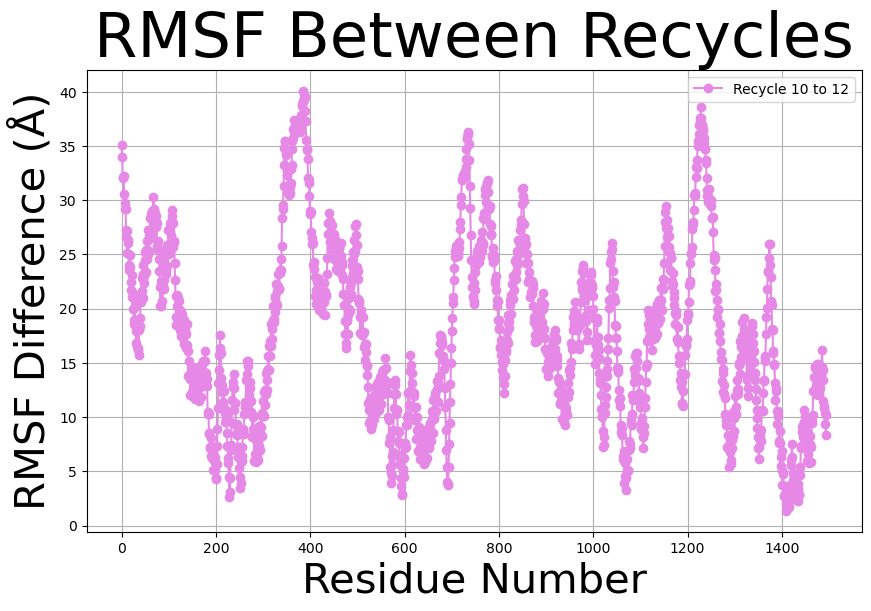

In [47]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Function to extract Cα coordinates from a PDB file
def extract_ca_coordinates(pdb_file, chainID):
    ca_coords = []
    
    with open(pdb_file, 'r') as file:
        for line in file:
            if line.startswith("ATOM") and " CA " in line and line[21] == chainID:
                x = float(line[30:38].strip())
                y = float(line[38:46].strip())
                z = float(line[46:54].strip())
                ca_coords.append([x, y, z])
    
    return np.array(ca_coords)

# Function to superpose structures to a reference structure
def superpose_structures(ref_coords, target_coords):
    ref_center = np.mean(ref_coords, axis=0)
    target_center = np.mean(target_coords, axis=0)

    ref_centered = ref_coords - ref_center
    target_centered = target_coords - target_center

    H = np.dot(target_centered.T, ref_centered)
    U, S, Vt = np.linalg.svd(H)
    R = np.dot(Vt.T, U.T)

    if np.linalg.det(R) < 0:
        Vt[-1, :] *= -1
        R = np.dot(Vt.T, U.T)

    aligned_coords = np.dot(target_centered, R) + ref_center
    return aligned_coords

# Function to calculate the RMSF for each residue
def calculate_rmsf(aligned_coords):
    average_coords = np.mean(aligned_coords, axis=0)  # Mean coordinates per residue
    rmsf = np.sqrt(np.mean(np.sum((aligned_coords - average_coords)**2, axis=2), axis=0))
    return rmsf

# Function to compute RMSF for a single recycle
def compute_rmsf_for_recycle(folder, model_number, model_seed, recycle, chainID='A'):
    pdb_file = None
    for filename in os.listdir(folder):
        if (filename.endswith(".pdb") and 
            f'model_{model_number}_ptm_r{recycle}_seed{model_seed}' in filename):
            pdb_file = os.path.join(folder, filename)
            break

    if pdb_file is None:
        print(f"PDB file for recycle {recycle} with model {model_number} and seed {model_seed} not found.")
        return None
    
    ca_coords = extract_ca_coordinates(pdb_file, chainID)
    return ca_coords

# Function to analyze RMSF differences between r_start and r_end
def analyze_rmsf_range(folder, model_number, model_seed, r_start, r_end, chainID='A'):
    coords_start = compute_rmsf_for_recycle(folder, model_number, model_seed, r_start, chainID)
    coords_end = compute_rmsf_for_recycle(folder, model_number, model_seed, r_end, chainID)
    
    if coords_start is None or coords_end is None:
        print(f"Could not calculate RMSF for recycle {r_start} to {r_end}.")
        return None, None

    # Superpose structures
    aligned_start = superpose_structures(coords_start, coords_start)  # Align to itself for consistency
    aligned_end = superpose_structures(coords_start, coords_end)  # Align `r_end` to `r_start`
    
    # Combine and calculate RMSF
    aligned_coords = np.array([aligned_start, aligned_end])
    rmsf = calculate_rmsf(aligned_coords)
    
    return rmsf, (r_start, r_end)

# Plot RMSF for a single range
def plot_rmsf_range(rmsf, recycle_range, color=None):
    plt.figure(figsize=(10, 6))
    
    if rmsf is not None:
        r_start, r_end = recycle_range
        plt.plot(rmsf, marker='o', linestyle='-', color=color, label=f'Recycle {r_start} to {r_end}')
    
    plt.title('RMSF Between Recycles', fontsize=45)
    plt.xlabel('Residue Number', fontsize=30)
    plt.ylabel('RMSF Difference (Å)', fontsize=30)
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

# Example Usage
# Example Usage
folder = '/Users/adrianahernandezgonzalez/LabNotebook/11-24/states/partialAlphaCaV12HS8HLPlocalrun_b3702_8_16_10/pdb/'
model_number = 1
model_seed = 0
r_start = 10  # Starting recycle
r_end = 12    # Ending recycle
custom_color = '#e689e6' #['#e689e6','#e891c3']#['#ea96a3', '#e39361'] # '#'#be9b4a', '#9fa046', '#7aaa48', '#48af79', '#4aac99', '#4dabae', '#8eaee7', '#bfa3ea', '#e689e6','#e891c3'

rmsf, recycle_range = analyze_rmsf_range(folder, model_number, model_seed, r_start, r_end)
plot_rmsf_range(rmsf, recycle_range, color=custom_color)
